In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import r2_score,accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Breast_cancer_data.csv")

In [4]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


<Axes: >

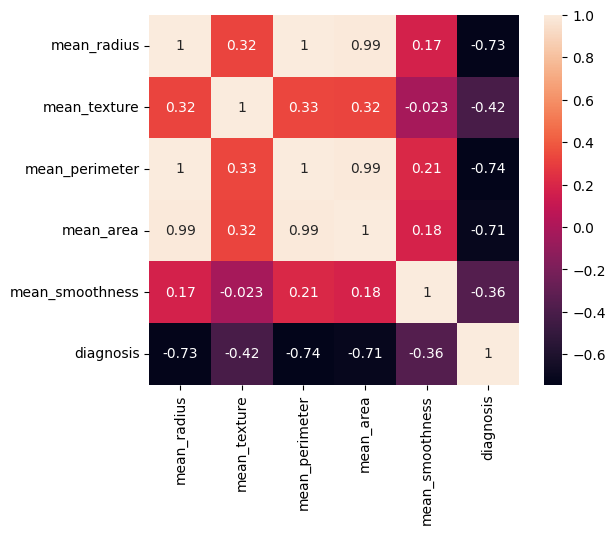

In [6]:
datacorr = data.corr()
sns.heatmap(datacorr, annot = True, square = True)

In [7]:
data = data.drop('mean_area', axis = 1)

<Axes: >

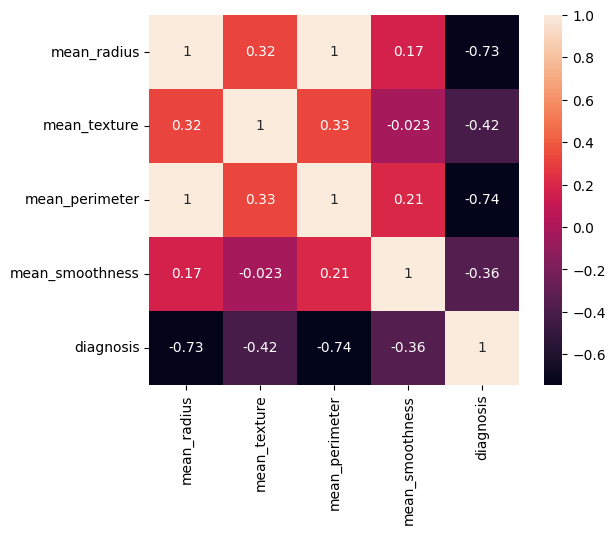

In [8]:
datacorr = data.corr()
sns.heatmap(datacorr, annot = True, square = True)

In [9]:
data.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_smoothness,diagnosis
0,17.99,10.38,122.80,0.11840,0
1,20.57,17.77,132.90,0.08474,0
2,19.69,21.25,130.00,0.10960,0
3,11.42,20.38,77.58,0.14250,0
4,20.29,14.34,135.10,0.10030,0


In [10]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [11]:
x_scaler = MinMaxScaler()
scaled_x = x_scaler.fit_transform(x)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, random_state = 42, test_size = 0.2)

In [13]:
x_train

array([[0.09692839, 0.25769361, 0.10365559, 0.48722578],
       [0.66775522, 0.57017247, 0.68350494, 0.55493365],
       [0.10374367, 0.14034494, 0.10648884, 0.22190124],
       ...,
       [0.34592267, 0.2404464 , 0.32140142, 0.10526316],
       [0.33125089, 0.33513696, 0.32706793, 0.48180915],
       [0.24605992, 0.36557322, 0.23101375, 0.24826216]])

In [14]:
model = Sequential()
model.add(Dense(16, activation = 'relu', input_dim = 4))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [15]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
early_stopping = callbacks.EarlyStopping(min_delta = 0.001, patience = 150, verbose = 1, restore_best_weights = True)
model.fit(x_train, y_train, epochs = 500, validation_split = 0.2, batch_size = 32, callbacks = [early_stopping])

Epoch 1/500
12/12 [==============================] - 2s 63ms/step - loss: 0.7003 - accuracy: 0.6264 - val_loss: 0.6901 - val_accuracy: 0.6374
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6917 - accuracy: 0.6264 - val_loss: 0.6831 - val_accuracy: 0.6374
Epoch 3/500
12/12 [==============================] - 0s 7ms/step - loss: 0.6853 - accuracy: 0.6264 - val_loss: 0.6765 - val_accuracy: 0.6374
Epoch 4/500
12/12 [==============================] - 0s 7ms/step - loss: 0.6778 - accuracy: 0.6264 - val_loss: 0.6680 - val_accuracy: 0.6374
Epoch 5/500
12/12 [==============================] - 0s 7ms/step - loss: 0.6671 - accuracy: 0.6264 - val_loss: 0.6518 - val_accuracy: 0.6374
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6517 - accuracy: 0.6264 - val_loss: 0.6332 - val_accuracy: 0.6374
Epoch 7/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6384 - accuracy: 0.6264 - val_loss: 0.6200 - val_accuracy: 0.6374
Epoch 8/500


In [17]:
model.evaluate(scaled_x, y)

18/18 [==============================] - 0s 1ms/step - loss: 0.1724 - accuracy: 0.9332


[0.17244555056095123, 0.9332161545753479]

In [18]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1482 - accuracy: 0.9561


[0.1482190638780594, 0.9561403393745422]

In [19]:
scaled_x[19]

array([0.31042643, 0.15725397, 0.30177597, 0.40769161])

In [23]:
x1 = float(input())
x2 = float(input())
x3 = float(input())
x4 = float(input())

17.99
10.38
122.8
0.1184


In [24]:
t = np.array([[x1, x2, x3, x4]])
res = model.predict(t)

1/1 [==============================] - 0s 19ms/step


In [25]:
res

array([[0.]], dtype=float32)